<a href="https://colab.research.google.com/github/jcj217-mc/Data_205/blob/main/Data205Project_CPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import packages
import pandas as pd
import numpy as np
import os 
import json

In [2]:
# tab-separated data into pandas data frame.
df = pd.read_json('https://data.montgomerycountymd.gov/resource/sari-cs3z.json')  

In [3]:
df.head()

,month,shift_1,shift_2,shift_3,traffic,criminal,released_personal_recognizance,released_unsecured_bond,committed_with_bond,district_court_bench_warrant,district_court_arrest_warrant,on_view_arrest_soc,circuit_court_warrant
0,2021-03-01T00:00:00.000,138,160,195,41,452,64.0,105.0,199.0,123.0,137.0,161.0,32.0
1,2021-02-01T00:00:00.000,115,100,139,28,326,27.0,108.0,130.0,92.0,107.0,121.0,25.0
2,2021-01-01T00:00:00.000,123,127,135,25,360,70.0,92.0,160.0,102.0,91.0,159.0,22.0
3,2020-12-01T00:00:00.000,143,148,138,41,388,57.0,105.0,207.0,121.0,115.0,151.0,14.0
4,2020-11-01T00:00:00.000,141,113,125,39,340,53.0,108.0,162.0,129.0,74.0,145.0,15.0


In [4]:
df.shape

(57, 13)

In [5]:
df.isnull().sum()

month                             0
shift_1                           0
shift_2                           0
shift_3                           0
traffic                           0
criminal                          0
released_personal_recognizance    6
released_unsecured_bond           6
committed_with_bond               6
district_court_bench_warrant      6
district_court_arrest_warrant     6
on_view_arrest_soc                6
circuit_court_warrant             6
dtype: int64

In [6]:
# Renaming 'month' column to 'date' column
df.rename(columns={'month': 'date'}, inplace=True)
df.head(1)

,date,shift_1,shift_2,shift_3,traffic,criminal,released_personal_recognizance,released_unsecured_bond,committed_with_bond,district_court_bench_warrant,district_court_arrest_warrant,on_view_arrest_soc,circuit_court_warrant
0,2021-03-01T00:00:00.000,138,160,195,41,452,64.0,105.0,199.0,123.0,137.0,161.0,32.0


In [7]:
# Checking data types for each column
print(df.dtypes)

date                               object
shift_1                             int64
shift_2                             int64
shift_3                             int64
traffic                             int64
criminal                            int64
released_personal_recognizance    float64
released_unsecured_bond           float64
committed_with_bond               float64
district_court_bench_warrant      float64
district_court_arrest_warrant     float64
on_view_arrest_soc                float64
circuit_court_warrant             float64
dtype: object


In [8]:
# Converting date information to datetime from object and removing time from date
df.date = pd.to_datetime(df.date)
# df['date'] = pd.to_datetime(df['date']).dt.date

In [9]:
df.head()

,date,shift_1,shift_2,shift_3,traffic,criminal,released_personal_recognizance,released_unsecured_bond,committed_with_bond,district_court_bench_warrant,district_court_arrest_warrant,on_view_arrest_soc,circuit_court_warrant
0,2021-03-01,138,160,195,41,452,64.0,105.0,199.0,123.0,137.0,161.0,32.0
1,2021-02-01,115,100,139,28,326,27.0,108.0,130.0,92.0,107.0,121.0,25.0
2,2021-01-01,123,127,135,25,360,70.0,92.0,160.0,102.0,91.0,159.0,22.0
3,2020-12-01,143,148,138,41,388,57.0,105.0,207.0,121.0,115.0,151.0,14.0
4,2020-11-01,141,113,125,39,340,53.0,108.0,162.0,129.0,74.0,145.0,15.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   date                            57 non-null     datetime64[ns]
 1   shift_1                         57 non-null     int64         
 2   shift_2                         57 non-null     int64         
 3   shift_3                         57 non-null     int64         
 4   traffic                         57 non-null     int64         
 5   criminal                        57 non-null     int64         
 6   released_personal_recognizance  51 non-null     float64       
 7   released_unsecured_bond         51 non-null     float64       
 8   committed_with_bond             51 non-null     float64       
 9   district_court_bench_warrant    51 non-null     float64       
 10  district_court_arrest_warrant   51 non-null     float64       
 11  on_view_

In [11]:
# create new "total" column with "traffic" + "criminal"
total = []
for index, row in df.iterrows(): 
      total.append(row.traffic + row.criminal)

In [12]:
 df['total'] = total

In [13]:
df.head(1)

,date,shift_1,shift_2,shift_3,traffic,criminal,released_personal_recognizance,released_unsecured_bond,committed_with_bond,district_court_bench_warrant,district_court_arrest_warrant,on_view_arrest_soc,circuit_court_warrant,total
0,2021-03-01,138,160,195,41,452,64.0,105.0,199.0,123.0,137.0,161.0,32.0,493


In [14]:
df.head(1)

,date,shift_1,shift_2,shift_3,traffic,criminal,released_personal_recognizance,released_unsecured_bond,committed_with_bond,district_court_bench_warrant,district_court_arrest_warrant,on_view_arrest_soc,circuit_court_warrant,total
0,2021-03-01,138,160,195,41,452,64.0,105.0,199.0,123.0,137.0,161.0,32.0,493


In [15]:
# Change column names with rename() function
df = df.rename(columns = {"month": "date", "released_personal_recognizance": "RPR", "released_unsecured_bond":"released_bond", "committed_with_bond":"Committed", "district_court_bench_warrant" : "dc_bench_warrant", "district_court_arrest_warrant": "dc_arrest_warrant", "on_view_arrest_soc": "PC_arrest", "circuit_court_warrant": 'cir_ct_warrant'})

In [16]:
df.describe()

,shift_1,shift_2,shift_3,traffic,criminal,RPR,released_bond,Committed,dc_bench_warrant,dc_arrest_warrant,PC_arrest,cir_ct_warrant,total
count,57.000000,57.000000,57.000000,57.000000,57.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,57.000000
mean,262.245614,231.736842,296.263158,147.543860,687.666667,149.784314,177.980392,254.058824,315.666667,145.823529,263.470588,40.843137,835.210526
std,75.630748,61.262178,80.087793,63.973787,193.405785,59.979768,55.575711,60.373309,120.274131,34.584798,64.784366,19.150324,253.170449
min,90.000000,90.000000,103.000000,25.000000,257.000000,27.000000,65.000000,130.000000,77.000000,36.000000,121.000000,14.000000,283.000000
25%,245.000000,224.000000,287.000000,128.000000,616.000000,116.500000,143.000000,204.500000,269.500000,133.500000,233.500000,33.000000,772.000000
50%,288.000000,255.000000,327.000000,168.000000,717.000000,163.000000,174.000000,274.000000,365.000000,150.000000,292.000000,41.000000,897.000000
75%,319.000000,270.000000,348.000000,194.000000,809.000000,196.500000,212.000000,295.500000,396.000000,171.500000,307.500000,46.500000,990.000000
max,349.000000,310.000000,405.000000,247.000000,983.000000,261.000000,299.000000,357.000000,454.000000,203.000000,351.000000,146.000000,1230.000000


In [17]:
df.drop(['shift_1', 'shift_2', 'shift_3'], axis=1, inplace=True)

In [18]:
# Reordering columns to have total column after traffic and criminal
df = df[['date', 'traffic', 'criminal', 'total', 'RPR', 'released_bond', 'Committed', 'dc_bench_warrant', 'dc_arrest_warrant', 'PC_arrest', 'cir_ct_warrant']]

In [19]:
df.head()

,date,traffic,criminal,total,RPR,released_bond,Committed,dc_bench_warrant,dc_arrest_warrant,PC_arrest,cir_ct_warrant
0,2021-03-01,41,452,493,64.0,105.0,199.0,123.0,137.0,161.0,32.0
1,2021-02-01,28,326,354,27.0,108.0,130.0,92.0,107.0,121.0,25.0
2,2021-01-01,25,360,385,70.0,92.0,160.0,102.0,91.0,159.0,22.0
3,2020-12-01,41,388,429,57.0,105.0,207.0,121.0,115.0,151.0,14.0
4,2020-11-01,39,340,379,53.0,108.0,162.0,129.0,74.0,145.0,15.0


In [20]:
# create new "total released" column with "RPR" + "Released on Bond"
total_released = []
for index, row in df.iterrows(): 
      total_released.append(row.RPR + row.released_bond)

In [21]:
 df['total_released'] = total_released

In [22]:
df.head(1)

,date,traffic,criminal,total,RPR,released_bond,Committed,dc_bench_warrant,dc_arrest_warrant,PC_arrest,cir_ct_warrant,total_released
0,2021-03-01,41,452,493,64.0,105.0,199.0,123.0,137.0,161.0,32.0,169.0


In [23]:
# creating list of just release versus detention
df_release = df.drop(list(df)[7:11], axis=1)

In [24]:
df_release.head()

,date,traffic,criminal,total,RPR,released_bond,Committed,total_released
0,2021-03-01,41,452,493,64.0,105.0,199.0,169.0
1,2021-02-01,28,326,354,27.0,108.0,130.0,135.0
2,2021-01-01,25,360,385,70.0,92.0,160.0,162.0
3,2020-12-01,41,388,429,57.0,105.0,207.0,162.0
4,2020-11-01,39,340,379,53.0,108.0,162.0,161.0


In [25]:
 # Computing Percentage
df_release_1 = df_release
# for cumulative percentages in the future: df_release_1['percent_RPR'] = (df_release.RPR.sum() / df_release.total.cumsum()) * 100
df_release_1['percent_RPR'] = (df_release.RPR / df_release.total) * 100
df_release_1['percent_bond'] = (df_release_1.released_bond / df_release_1.total ) * 100
df_release_1['percent_committed'] = (df_release_1.Committed / df_release_1.total ) * 100
df_release_1['percent_released'] = ((df_release_1.released_bond + df_release_1.RPR) / df_release_1.total ) * 100
df_release_1
df_release_1.head(1)

,date,traffic,criminal,total,RPR,released_bond,Committed,total_released,percent_RPR,percent_bond,percent_committed,percent_released
0,2021-03-01,41,452,493,64.0,105.0,199.0,169.0,12.981744,21.298174,40.365112,34.279919


In [26]:
df_release_1['total_percent'] = (df_release_1.percent_committed + df_release_1.percent_released)
df_release_1.head(5)

,date,traffic,criminal,total,RPR,released_bond,Committed,total_released,percent_RPR,percent_bond,percent_committed,percent_released,total_percent
0,2021-03-01,41,452,493,64.0,105.0,199.0,169.0,12.981744,21.298174,40.365112,34.279919,74.645030
1,2021-02-01,28,326,354,27.0,108.0,130.0,135.0,7.627119,30.508475,36.723164,38.135593,74.858757
2,2021-01-01,25,360,385,70.0,92.0,160.0,162.0,18.181818,23.896104,41.558442,42.077922,83.636364
3,2020-12-01,41,388,429,57.0,105.0,207.0,162.0,13.286713,24.475524,48.251748,37.762238,86.013986
4,2020-11-01,39,340,379,53.0,108.0,162.0,161.0,13.984169,28.496042,42.744063,42.480211,85.224274


In [27]:
# In February 2021, 89 arrests unaccounted for 
27+108+130

265

In [28]:
354-265

89

In [29]:
# Create separate columns for month day and year 
df.date = pd.to_datetime(df.date)

In [30]:
df[['month', 'year']] = df.date.apply(lambda x: pd.Series(x.strftime("%m, %Y").split(",")))
df.head()

,date,traffic,criminal,total,RPR,released_bond,Committed,dc_bench_warrant,dc_arrest_warrant,PC_arrest,cir_ct_warrant,total_released,month,year
0,2021-03-01,41,452,493,64.0,105.0,199.0,123.0,137.0,161.0,32.0,169.0,03,2021
1,2021-02-01,28,326,354,27.0,108.0,130.0,92.0,107.0,121.0,25.0,135.0,02,2021
2,2021-01-01,25,360,385,70.0,92.0,160.0,102.0,91.0,159.0,22.0,162.0,01,2021
3,2020-12-01,41,388,429,57.0,105.0,207.0,121.0,115.0,151.0,14.0,162.0,12,2020
4,2020-11-01,39,340,379,53.0,108.0,162.0,129.0,74.0,145.0,15.0,161.0,11,2020


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               57 non-null     datetime64[ns]
 1   traffic            57 non-null     int64         
 2   criminal           57 non-null     int64         
 3   total              57 non-null     int64         
 4   RPR                51 non-null     float64       
 5   released_bond      51 non-null     float64       
 6   Committed          51 non-null     float64       
 7   dc_bench_warrant   51 non-null     float64       
 8   dc_arrest_warrant  51 non-null     float64       
 9   PC_arrest          51 non-null     float64       
 10  cir_ct_warrant     51 non-null     float64       
 11  total_released     51 non-null     float64       
 12  month              57 non-null     object        
 13  year               57 non-null     object        
dtypes: datetime6

In [32]:
df.head(1)

,date,traffic,criminal,total,RPR,released_bond,Committed,dc_bench_warrant,dc_arrest_warrant,PC_arrest,cir_ct_warrant,total_released,month,year
0,2021-03-01,41,452,493,64.0,105.0,199.0,123.0,137.0,161.0,32.0,169.0,03,2021


In [33]:
# Reordering columns to have total column after traffic and criminal
df = df[['date', 'month', 'year', 'traffic', 'criminal', 'total', 'RPR', 'released_bond', 'Committed', 'total_released', 'dc_bench_warrant', 'dc_arrest_warrant', 'PC_arrest', 'cir_ct_warrant']]

In [34]:
df.head(1)

,date,month,year,traffic,criminal,total,RPR,released_bond,Committed,total_released,dc_bench_warrant,dc_arrest_warrant,PC_arrest,cir_ct_warrant
0,2021-03-01,03,2021,41,452,493,64.0,105.0,199.0,169.0,123.0,137.0,161.0,32.0


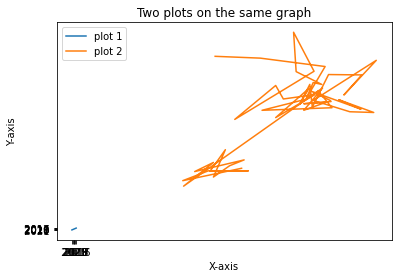

In [35]:
# Make graph comparing total released versus committed
import matplotlib.pyplot as plt

# Declaring the points for first line plot
X1 = df['year']
Y1 = df['year']
# plotting the first plot
plt.plot(X1, Y1, label = "plot 1") 
# Declaring the points for second line plot
X2 = df['Committed']
Y2 = df['total_released']
# plotting the second plot 
plt.plot(X2, Y2, label = "plot 2") 
  
# Labeling the X-axis 
plt.xlabel('X-axis') 
# Labeling the Y-axis 
plt.ylabel('Y-axis') 
# Give a title to the graph
plt.title('Two plots on the same graph') 
  
# Show a legend on the plot 
plt.legend() 
 
plt.show() 

Interesting but not what was expected!

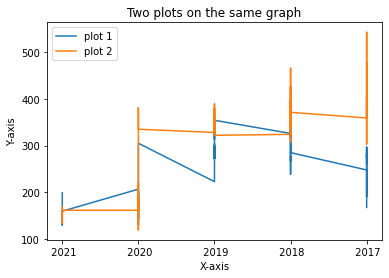

In [36]:
# Make graph comparing total released versus committed
import matplotlib.pyplot as plt

# Declaring the points for first line plot
X1 = df['year']
Y1 = df['Committed']
# plotting the first plot
plt.plot(X1, Y1, label = "plot 1") 
# Declaring the points for second line plot
X2 = df['year']
Y2 = df['total_released']
# plotting the second plot 
plt.plot(X2, Y2, label = "plot 2") 
  
# Labeling the X-axis 
plt.xlabel('X-axis') 
# Labeling the Y-axis 
plt.ylabel('Y-axis') 
# Give a title to the graph
plt.title('Two plots on the same graph') 
  
# Show a legend on the plot 
plt.legend() 
 
plt.show() 

again, cool, but not quite what was expected

In [37]:
# Creating Dataset just based on arrest cause - Warrant or PC
df_warrant = df.drop(list(df)[3:5], axis=1)

In [38]:
df_warrant.head(1)

,date,month,year,total,RPR,released_bond,Committed,total_released,dc_bench_warrant,dc_arrest_warrant,PC_arrest,cir_ct_warrant
0,2021-03-01,03,2021,493,64.0,105.0,199.0,169.0,123.0,137.0,161.0,32.0


In [39]:
df_warrant2 = df_warrant.drop(list(df_warrant)[4:8], axis = 1)

In [40]:
df_warrant2.head()

,date,month,year,total,dc_bench_warrant,dc_arrest_warrant,PC_arrest,cir_ct_warrant
0,2021-03-01,03,2021,493,123.0,137.0,161.0,32.0
1,2021-02-01,02,2021,354,92.0,107.0,121.0,25.0
2,2021-01-01,01,2021,385,102.0,91.0,159.0,22.0
3,2020-12-01,12,2020,429,121.0,115.0,151.0,14.0
4,2020-11-01,11,2020,379,129.0,74.0,145.0,15.0


In [41]:
df_warrant2['percent_PC'] = (df_warrant2.PC_arrest / df_warrant2.total) * 100
df_warrant2.head()

,date,month,year,total,dc_bench_warrant,dc_arrest_warrant,PC_arrest,cir_ct_warrant,percent_PC
0,2021-03-01,03,2021,493,123.0,137.0,161.0,32.0,32.657201
1,2021-02-01,02,2021,354,92.0,107.0,121.0,25.0,34.180791
2,2021-01-01,01,2021,385,102.0,91.0,159.0,22.0,41.298701
3,2020-12-01,12,2020,429,121.0,115.0,151.0,14.0,35.198135
4,2020-11-01,11,2020,379,129.0,74.0,145.0,15.0,38.258575


In [42]:
df_warrant2['percent_warrant'] = ((df_warrant2.dc_bench_warrant + df_warrant2.dc_arrest_warrant + df_warrant2.cir_ct_warrant)/ df_warrant2.total) * 100
df_warrant2.head(1)

,date,month,year,total,dc_bench_warrant,dc_arrest_warrant,PC_arrest,cir_ct_warrant,percent_PC,percent_warrant
0,2021-03-01,03,2021,493,123.0,137.0,161.0,32.0,32.657201,59.229209


In [43]:
df_warrant2['percent total'] = (df_warrant2.percent_PC + df_warrant2.percent_warrant)
df_warrant2.head(1)

,date,month,year,total,dc_bench_warrant,dc_arrest_warrant,PC_arrest,cir_ct_warrant,percent_PC,percent_warrant,percent total
0,2021-03-01,03,2021,493,123.0,137.0,161.0,32.0,32.657201,59.229209,91.88641


In [61]:
# Average percent of arrests with a warrant out of total arrests 
df_warrant2.percent_warrant.mean()

62.57076342339692

In [62]:
# Average percent of arrests without a warrant out of total arrests
df_warrant2.percent_PC.mean()

33.98824256598927

<function matplotlib.pyplot.show>

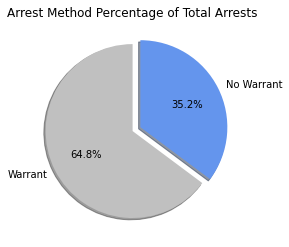

In [70]:
slices = [df_warrant2.percent_warrant.mean(), df_warrant2.percent_PC.mean()]
arrestpct =['Warrant', 'No Warrant']
cols = ['silver','cornflowerblue']

plt.pie(slices,
        labels=arrestpct,
        colors = cols,
        startangle=90,# first division a vertical line
        shadow=True,
        explode=(0,0.1), # eating pulled out a bit at 0.1
        autopct='%1.1f%%') # overlay the percentages on graph itself

plt.title('Arrest Method Percentage of Total Arrests')
plt.show

That means in 35% of cases a probable cause determination for arrest is not conducted by a judge, but instead is conducted in the moment by a police officer.

In [44]:
# 10 arrests are unaccounted for
92+107+121+25

345

In [45]:
# Number of people arrested each month
df_monthtotal = df[['date' , 'total']]
df_monthtotal

,date,total
0,2021-03-01,493
1,2021-02-01,354
2,2021-01-01,385
3,2020-12-01,429
4,2020-11-01,379
5,2020-10-01,506
6,2020-09-01,425
7,2020-08-01,422
8,2020-07-01,462
9,2020-06-01,357


Text(0.5, 1.0, 'Bail by Year')

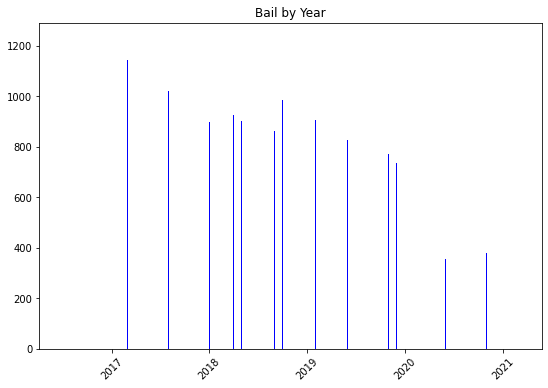

In [46]:
plt.figure(figsize=(9,6)) 
plt.bar(x=df_monthtotal['date'], 
        height=df_monthtotal['total'], 
        color='blue') 
plt.xticks(rotation=45)
plt.title('Bail by Year')

In [82]:
import plotly
import plotly.io as pio
import plotly.express as px
import plotly.graph_objs as go

pio.templates.default = "plotly_white"

fig = go.Figure(data=go.Scatter(x=df_monthtotal['date'].astype(dtype=str), 
                        y=df_monthtotal['total'],
                        marker_color='cornflowerblue', text="counts"))
fig.update_layout({"title": 'Arrest Bookings by Date',
                   "xaxis": {"title":"Date"},
                   "yaxis": {"title":"Total Arrest Bookings"},
                   "showlegend": False})

fig.update_layout(title_x=0.5)


fig.show()


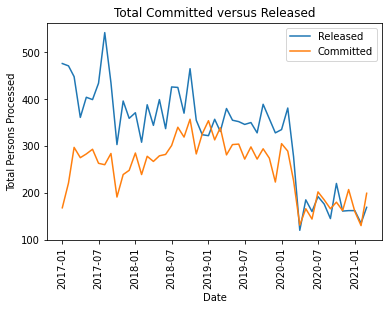

In [48]:
import matplotlib.pyplot as plt 
ts1 = df['date'] # eg. "2001-01" and so on

# Declaring the points for first line plot
X1 = df.date
Y1 = df.total_released 
# plotting the first plot
plt.plot(X1, Y1, label = "Released") 
# Declaring the points for second line plot
X2 = df.date
Y2 = df.Committed
# plotting the second plot 
plt.plot(X2, Y2, label = "Committed") 
  
# Labeling the X-axis 
plt.xlabel('Date') 

# Labeling the Y-axis 
plt.ylabel('Total Persons Processed') 
# Give a title to the graph
plt.title('Total Committed versus Released') 

# plt.xaxis.set_major_formatter(DateFormatter("%y-%m")) 
plt.xticks(rotation=90)

# Show a legend on the plot 
plt.legend() 
 
plt.show() 

In [49]:
df.head()

,date,month,year,traffic,criminal,total,RPR,released_bond,Committed,total_released,dc_bench_warrant,dc_arrest_warrant,PC_arrest,cir_ct_warrant
0,2021-03-01,03,2021,41,452,493,64.0,105.0,199.0,169.0,123.0,137.0,161.0,32.0
1,2021-02-01,02,2021,28,326,354,27.0,108.0,130.0,135.0,92.0,107.0,121.0,25.0
2,2021-01-01,01,2021,25,360,385,70.0,92.0,160.0,162.0,102.0,91.0,159.0,22.0
3,2020-12-01,12,2020,41,388,429,57.0,105.0,207.0,162.0,121.0,115.0,151.0,14.0
4,2020-11-01,11,2020,39,340,379,53.0,108.0,162.0,161.0,129.0,74.0,145.0,15.0


In [50]:
df_year = df.groupby('year').mean()
df_year.head()

,traffic,criminal,total,RPR,released_bond,Committed,total_released,dc_bench_warrant,dc_arrest_warrant,PC_arrest,cir_ct_warrant
year,,,,,,,,,,,
2016,201.833333,933.666667,1135.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017,186.000000,840.250000,1026.250000,211.416667,207.583333,251.833333,419.000000,412.916667,155.166667,305.333333,49.416667
2018,181.500000,721.166667,902.666667,157.500000,218.500000,296.333333,376.000000,380.166667,167.000000,305.083333,42.333333
2019,161.000000,709.166667,870.166667,172.916667,176.750000,293.916667,349.666667,356.333333,162.166667,287.916667,40.250000
2020,63.583333,434.166667,497.750000,81.333333,128.166667,196.916667,209.500000,165.750000,107.500000,184.666667,35.000000


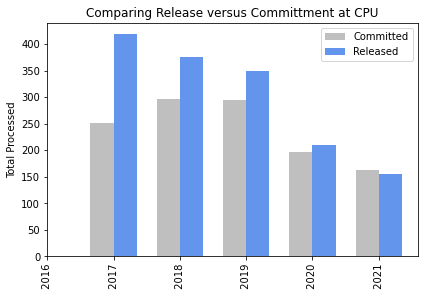

In [72]:
#PLOT 1 Average Bond Amount between race & gender

labels = df_year.index
committed = df_year.Committed
released = df_year.total_released

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 =ax.bar(x - width/2, committed, width, label='Committed',color='grey', alpha = 0.5)
rects2= ax.bar(x + width/2, released, width, label='Released', color='cornflowerblue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Total Processed')
ax.set_title('Comparing Release versus Committment at CPU')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.xticks(rotation=90)
plt.show()

In [52]:
# Example of the Shapiro-Wilk Normality Test for total people processed
# this makes sense 
from scipy.stats import shapiro
data = df.total
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.901, p=0.000
Probably not Gaussian


In [73]:
df.head()

,date,month,year,traffic,criminal,total,RPR,released_bond,Committed,total_released,dc_bench_warrant,dc_arrest_warrant,PC_arrest,cir_ct_warrant
0,2021-03-01,03,2021,41,452,493,64.0,105.0,199.0,169.0,123.0,137.0,161.0,32.0
1,2021-02-01,02,2021,28,326,354,27.0,108.0,130.0,135.0,92.0,107.0,121.0,25.0
2,2021-01-01,01,2021,25,360,385,70.0,92.0,160.0,162.0,102.0,91.0,159.0,22.0
3,2020-12-01,12,2020,41,388,429,57.0,105.0,207.0,162.0,121.0,115.0,151.0,14.0
4,2020-11-01,11,2020,39,340,379,53.0,108.0,162.0,161.0,129.0,74.0,145.0,15.0


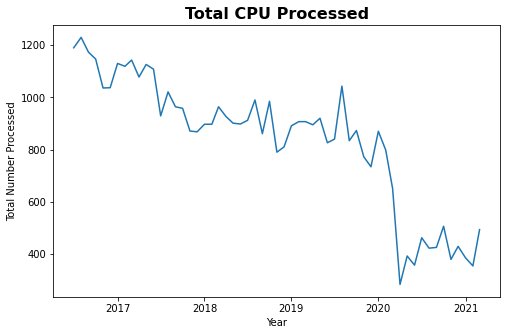

In [76]:
import matplotlib.pyplot as plt

#make plot larger
plt.figure(figsize = (8,5))

plt.title("Total CPU Processed", fontdict={'fontweight': 'bold', 'fontsize':16})
plt.xlabel("Year")
plt.ylabel("Total Number Processed")

plt.plot(df.date, df.total)

In [54]:
df.isnull().sum()

date                 0
month                0
year                 0
traffic              0
criminal             0
total                0
RPR                  6
released_bond        6
Committed            6
total_released       6
dc_bench_warrant     6
dc_arrest_warrant    6
PC_arrest            6
cir_ct_warrant       6
dtype: int64

In [55]:
df

,date,month,year,traffic,criminal,total,RPR,released_bond,Committed,total_released,dc_bench_warrant,dc_arrest_warrant,PC_arrest,cir_ct_warrant
0,2021-03-01,03,2021,41,452,493,64.0,105.0,199.0,169.0,123.0,137.0,161.0,32.0
1,2021-02-01,02,2021,28,326,354,27.0,108.0,130.0,135.0,92.0,107.0,121.0,25.0
2,2021-01-01,01,2021,25,360,385,70.0,92.0,160.0,162.0,102.0,91.0,159.0,22.0
3,2020-12-01,12,2020,41,388,429,57.0,105.0,207.0,162.0,121.0,115.0,151.0,14.0
4,2020-11-01,11,2020,39,340,379,53.0,108.0,162.0,161.0,129.0,74.0,145.0,15.0
5,2020-10-01,10,2020,61,445,506,75.0,145.0,180.0,220.0,162.0,140.0,166.0,29.0
6,2020-09-01,09,2020,38,387,425,57.0,88.0,166.0,145.0,116.0,125.0,146.0,21.0
7,2020-08-01,08,2020,29,393,422,59.0,117.0,185.0,176.0,132.0,100.0,159.0,146.0
8,2020-07-01,07,2020,31,431,462,73.0,119.0,202.0,192.0,108.0,132.0,171.0,21.0
9,2020-06-01,06,2020,32,325,357,66.0,94.0,144.0,160.0,115.0,83.0,135.0,25.0


In [56]:
df.head()


,date,month,year,traffic,criminal,total,RPR,released_bond,Committed,total_released,dc_bench_warrant,dc_arrest_warrant,PC_arrest,cir_ct_warrant
0,2021-03-01,03,2021,41,452,493,64.0,105.0,199.0,169.0,123.0,137.0,161.0,32.0
1,2021-02-01,02,2021,28,326,354,27.0,108.0,130.0,135.0,92.0,107.0,121.0,25.0
2,2021-01-01,01,2021,25,360,385,70.0,92.0,160.0,162.0,102.0,91.0,159.0,22.0
3,2020-12-01,12,2020,41,388,429,57.0,105.0,207.0,162.0,121.0,115.0,151.0,14.0
4,2020-11-01,11,2020,39,340,379,53.0,108.0,162.0,161.0,129.0,74.0,145.0,15.0


In [57]:
df_dropNA = df.dropna()

In [58]:
# Example of the Pearson's Correlation test
from scipy.stats import pearsonr
data1 = df_dropNA.Committed
data2 = df_dropNA.total_released
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.9f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.698, p=0.000000013
Probably dependent


Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.

The statistics number ranges between 0 and 1.  Here there is a positive correlation.

In [59]:
# Example of the Spearman's Rank Correlation Test
from scipy.stats import spearmanr
data1 = df_dropNA.Committed
data2 = df_dropNA.total_released
stat, p = spearmanr(data1, data2)
print('stat=%.3f, p=%.9f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.531, p=0.000060619
Probably dependent


The statistics number ranges between 0 and 1.  Here there is a positive correlation.

**Since this dataset does not provide individual entries but rather total numbers for chunks of time we can not assess whether there is a relationship between method of arrest and later release or detainment.**